<a href="https://colab.research.google.com/github/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/6_Diagrama_de_Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=black size = 6 face="Verdana"><center><strong>SUPPLY CHAIN ANALYTICS - Gestión Moderna de la Cadena de Suministros</center></font>


  <font color=black><center>Fecha: 27-08-2024</center>


  <font color=#48c9b0><center>Elaborado por: Mg. Ec. Enrique F. Gutierrez Rivasplata</center>

### **Importando Paquetes:**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from datetime import datetime

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


### **Lectura y Comprensión de los Datos:**

In [ ]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer el archivo Excel con los datos simulados
# ==============================================================================
data = pd.read_excel('/content/drive/MyDrive/Análisis - Python/DATOS/Data1.xlsx')


# Copiamos el dataframe
# ==============================================================================
df = data.copy()

# Mostrar las primeras filas del dataframe
# ==============================================================================
df.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
0,2015-01-03,2204383,3111,204978,Shipping,Standard Class,CON-10004331147,2015-01-03,2015-01-03,80,...,66603.25,0.0,349.650000,164.365385,223.8,291.375000,560.635385,66603.25,528.600,67692.485385
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4113.704501
2,2015-01-03,2204387,3115,204754,Shipping,Standard Class,CON-10004331147,2015-01-05,2015-01-05,22,...,66150.00,0.0,8.910000,4.188462,11.8,7.425000,14.286462,66150.00,4488.750,70653.036462
3,2015-01-03,2204382,3110,1001830,Shipping,Standard Class,CON-10181604579,2015-01-05,2015-01-06,90,...,0.00,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,21752.75,32387.400,54360.743328
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,30453.85,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,63061.843328


In [ ]:
# Mostramos el número de filas y columnas
# ==============================================================================
print("La cantidad de columnas es: ",df.shape[1])
print("La cantidad de filas es: ",df.shape[0])

La cantidad de columnas es:  81
La cantidad de filas es:  26162


# **Gráfico de Pareto**

El diagrama de Pareto, también llamado **Curva Cerrada** o **Distribución A-B-C**

Es una gráica para organizar datos de forma que estos queden en orden descendente, de izquierda a derecha y separados por barras. Permite asignar un orden prioridades. El diagrama permite mostrar gráficamente el **Principio de Pareto** (pocos vitales, muchos triviales), es decir, que hay muchos problemas sin importancia frente a unos pocos muy importantes.

Hay que tener en cuenta que tanto la distribución de los efectos como sus posibles causas no es un proceso lineal sino que el 20% de las causas totales hace que sean originados por el 80% de los efectos y rebotes internos del pronosticado.

Su principal  uso que tiene el elaborar este tipo de gráfico es para poder establecer un orden de prioridades en la toma de decisiones dentro de una organización. Evaluar todas las fallas, saber si se pueden resolver o mejor evitarlas.

In [ ]:
plt.rcParams.update({'font.size':14})

In [ ]:
# Crea un nuevo DataFrame agrupando por 'Familia' y sumando 'Venta_Totales'
# ==============================================================================
df_grupo = df.groupby('Familia')['Venta_Totales'].sum()

# Crea una columna 'Ventas' con la suma de 'Venta_Totales' para cada 'Familia'
# ==============================================================================
df_grupo = df_grupo.to_frame().rename(columns={'Venta_Totales': 'Ventas'})

# Calcula el porcentaje de ventas para cada 'Familia'
# ==============================================================================
df_grupo['Porcentaje'] = (df_grupo['Ventas'] / df_grupo['Ventas'].sum()) * 100

# Calcula el porcentaje acumulado de ventas
# ==============================================================================
df_grupo['Porcentaje_Acumulado'] = df_grupo['Porcentaje'].cumsum()

In [ ]:
df_grupo.head()

,Ventas,Porcentaje,Porcentaje_Acumulado
Familia,,,
Abrazadera,56089.34,0.032511,0.032511
Accesorio,140815.38,0.081621,0.114133
Accesorio Limpieza,17875.48,0.010361,0.124494
Acordeon,1560592.38,0.904572,1.029066
Afinador Guitarra,46660.30,0.027046,1.056112


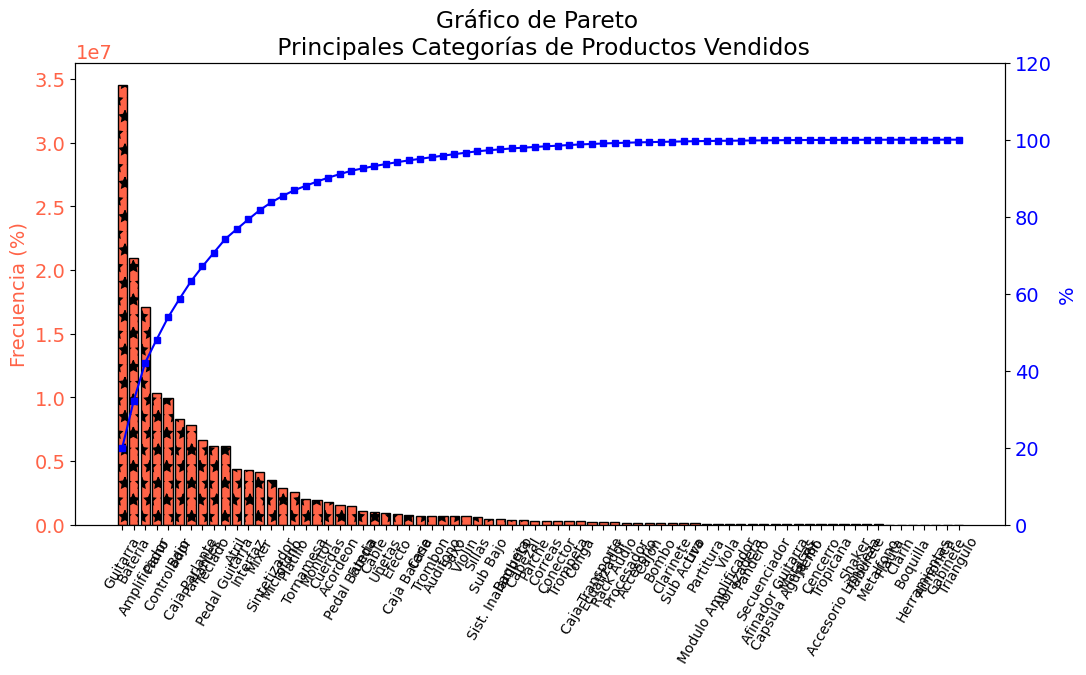

In [ ]:
fig,ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Gráfico de Pareto \n Principales Categorías de Productos Vendidos')

color1 = 'tomato'
#ax1.set_xlabel('X')
ax1.set_ylabel('Frecuencia (%)',color = color1)

# Sort df_grupo by 'Ventas' in descending order BEFORE calculating cumulative percentage
df_grupo_sorted = df_grupo.sort_values('Ventas', ascending=False)

# Recalculate 'Porcentaje_Acumulado' on the sorted DataFrame
df_grupo_sorted['Porcentaje_Acumulado'] = df_grupo_sorted['Porcentaje'].cumsum()

ax1.bar(df_grupo_sorted.index, df_grupo_sorted['Ventas'],color = color1,edgecolor = 'black',linewidth = 1, hatch = '*')
ax1.tick_params(axis = 'y',labelcolor = color1)

color2 = 'Blue'
ax2 = ax1.twinx()
ax2.set_ylabel('%',color = color2)

ax2.plot(df_grupo_sorted.index, df_grupo_sorted['Porcentaje_Acumulado'],color = color2,marker = 's',markersize = 5, linestyle = '-')

ax2.tick_params(axis = 'y',labelcolor = color2)
ax2.set_ylim([0,120])

for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_fontsize(10)

plt.savefig('GraficoPareto.png',format='png',dpi = 100, bbox_inches = 'tight')
plt.show()

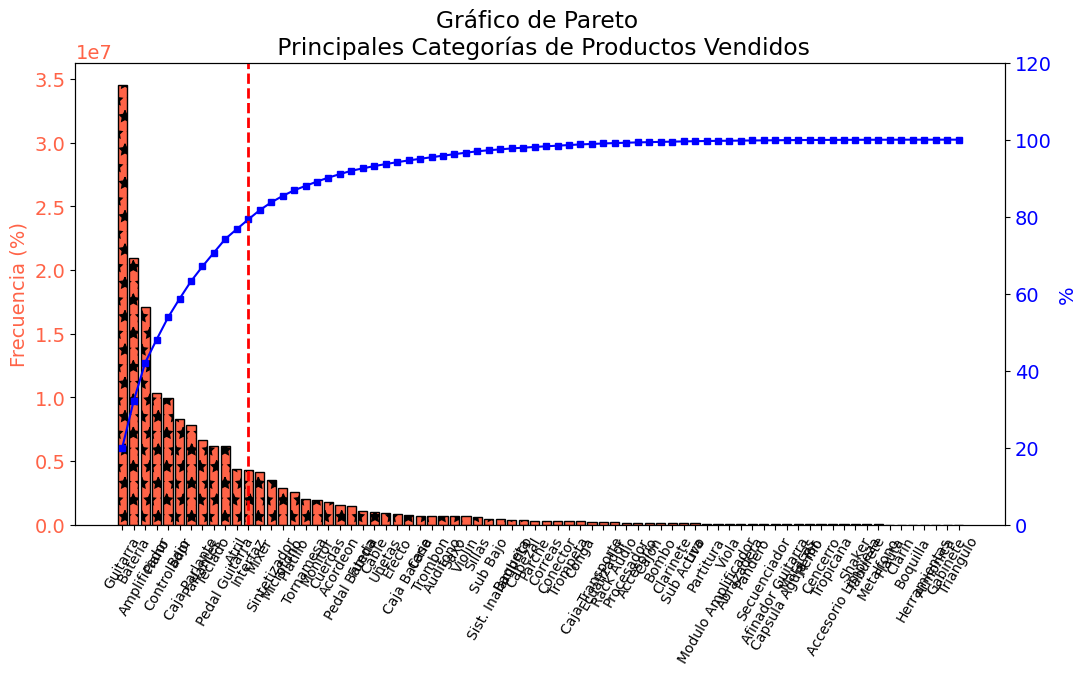

In [ ]:
# Grafico de Pareto
# ==============================================================================

fig,ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Gráfico de Pareto \n Principales Categorías de Productos Vendidos')

color1 = 'tomato'
ax1.set_ylabel('Frecuencia (%)',color = color1)

df_grupo_sorted = df_grupo.sort_values('Ventas', ascending=False)
df_grupo_sorted['Porcentaje_Acumulado'] = df_grupo_sorted['Porcentaje'].cumsum()

ax1.bar(df_grupo_sorted.index, df_grupo_sorted['Ventas'],color = color1,edgecolor = 'black',linewidth = 1, hatch = '*')
ax1.tick_params(axis = 'y',labelcolor = color1)

color2 = 'Blue'
ax2 = ax1.twinx()
ax2.set_ylabel('%',color = color2)

ax2.plot(df_grupo_sorted.index, df_grupo_sorted['Porcentaje_Acumulado'],color = color2,marker = 's',markersize = 5, linestyle = '-')
ax2.tick_params(axis = 'y',labelcolor = color2)
ax2.set_ylim([0,120])

for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_fontsize(10)

# Encuentre la coordenada x donde 'Porcentaje_Acumulado' es más cercano al 80%
x_coord = df_grupo_sorted['Porcentaje_Acumulado'][df_grupo_sorted['Porcentaje_Acumulado'] <= 80].idxmax()

# Dibuja una línea vertical en la marca del 80%.
plt.axvline(x=x_coord, color='red', linestyle='--', linewidth=2)

plt.savefig('GraficoPareto.png',format='png',dpi = 100, bbox_inches = 'tight')
plt.show()